# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [2]:
batch_size = 100

### Carregamento, criação dataset e do dataloader

In [3]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

100.0%
100.0%
100.0%
100.0%

Número de minibatches de trenamento: 600

Dimensões dos dados de um minibatch: torch.Size([100, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [4]:
print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 600


c:\Users\NicolasMatheusRegoNe\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\datasets\mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


## Modelo

In [5]:
model = torch.nn.Linear(28*28, 10)

In [6]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[-0.3475,  0.0115,  0.8849,  0.2622,  0.3401,  0.5957, -0.8648, -0.5189,
          0.4871, -0.3804]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [7]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [8]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

In [9]:
print('Final loss:', loss.data)

Final loss: tensor(0.2491)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

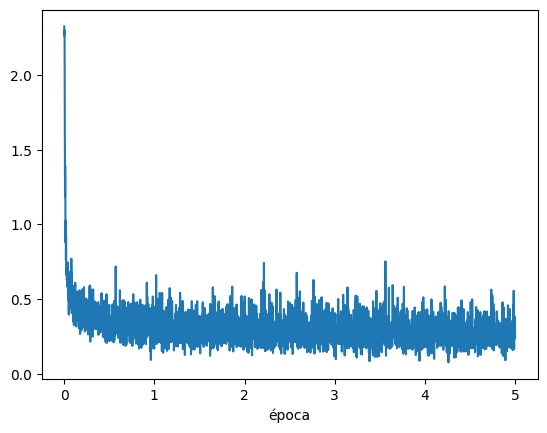

In [10]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

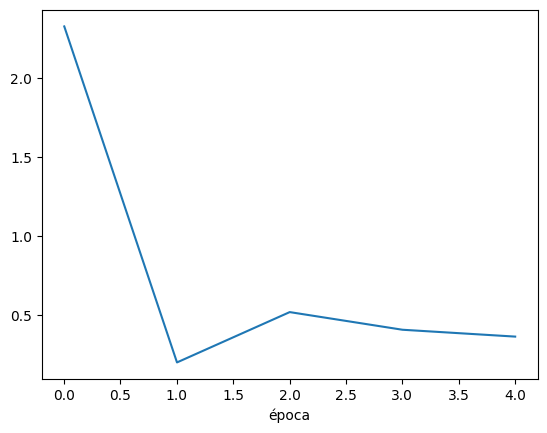

In [11]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch?
O tamanho do mini-batch é 50

2. Em uma época, quantos mini-batches existem?
Existem 1000 mini-batches em uma época.

3. Qual é a definição de época?
Uma época corresponde a uma passagem completa do algoritmo de treinamento por todas as amostras do conjunto de dados de treino.

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:{}
    - Época: 1/4, batch: 600


Iniciando treinamento...
Época 1/5 finalizada.
Época 2/5 finalizada.
Época 3/5 finalizada.
Época 4/5 finalizada.
Época 5/5 finalizada.


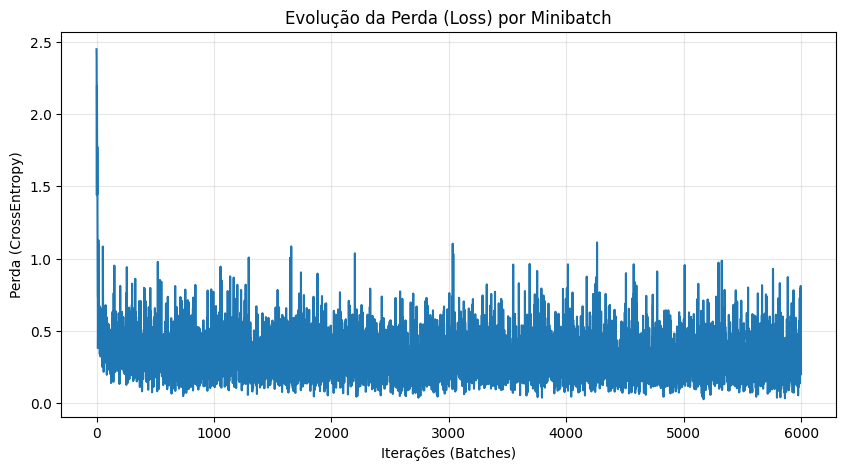

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import time

batch_size = 50
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

model = nn.Linear(784, 10)
if torch.cuda.is_available():
    model = model.cuda()

optimizer = optim.SGD(model.parameters(), lr=0.1)
criterion = nn.CrossEntropyLoss()

losses = []

print('Iniciando treinamento...')
nb_epoch = 5

for epoch in range(nb_epoch):
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.view(-1, 28*28)
        
        if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()

        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        losses.append(loss.item())
        
    print(f'Época {epoch+1}/{nb_epoch} finalizada.')

plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.title("Evolução da Perda (Loss) por Minibatch")
plt.xlabel("Iterações (Batches)")
plt.ylabel("Perda (CrossEntropy)")
plt.grid(True, alpha=0.3)
plt.show()

2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

Iniciando experimento com diferentes Batch Sizes...

Treinando com Batch Size = 50
Concluído em 50.22s. Perda final: 0.3037

Treinando com Batch Size = 100
Concluído em 45.49s. Perda final: 0.2815

Treinando com Batch Size = 1000
Concluído em 44.65s. Perda final: 0.3051

Treinando com Batch Size = 5000
Concluído em 35.60s. Perda final: 0.3817


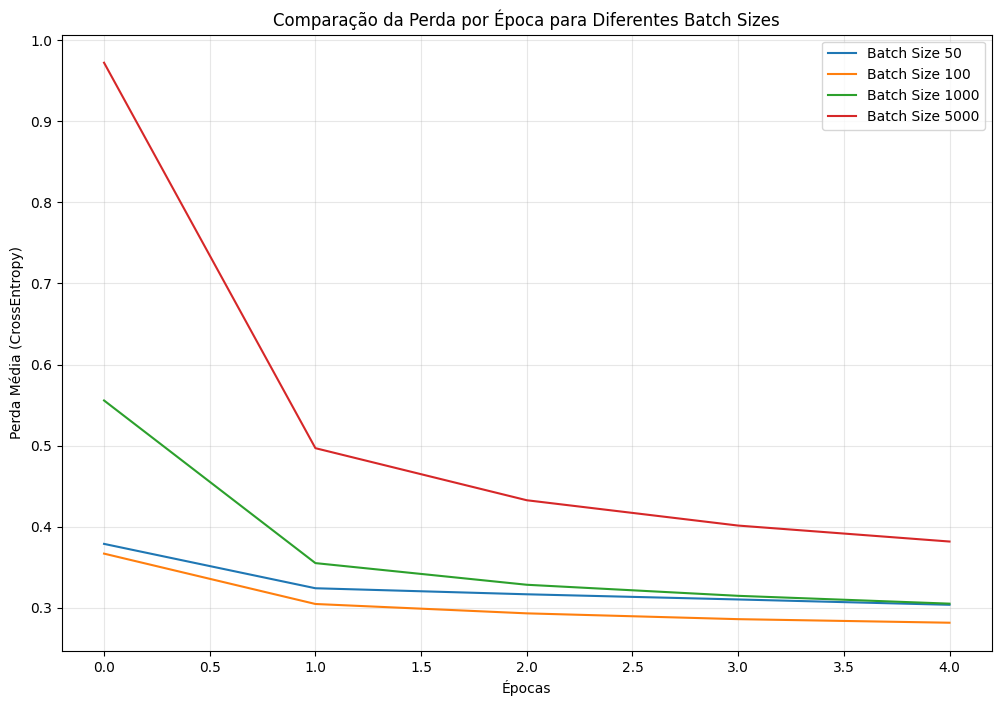

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import time

batch_sizes = [50, 100, 1000, 5000] 
nb_epoch = 5
learning_rate = 0.1

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)

loss_histories = {}

plt.figure(figsize=(12, 8))

print("Iniciando experimento com diferentes Batch Sizes...")

for bs in batch_sizes:
    print(f"\nTreinando com Batch Size = {bs}")
    
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=bs, shuffle=True)

    model = nn.Linear(28*28, 10)
    if torch.cuda.is_available():
        model = model.cuda()
        
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()

    epoch_losses = []

    start_time = time.time()
    for epoch in range(nb_epoch):
        running_loss = 0.0
        for data, target in train_loader:
            data = data.view(-1, 28*28)
            if torch.cuda.is_available():
                data, target = data.cuda(), target.cuda()

            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        avg_loss = running_loss / len(train_loader)
        epoch_losses.append(avg_loss)
        
    print(f"Concluído em {time.time() - start_time:.2f}s. Perda final: {epoch_losses[-1]:.4f}")

    plt.plot(epoch_losses, label=f'Batch Size {bs}')

plt.title("Comparação da Perda por Época para Diferentes Batch Sizes")
plt.xlabel("Épocas")
plt.ylabel("Perda Média (CrossEntropy)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Conclusões sobre os experimentos deste notebook


O notebook aplicou Regressão Logística ao MNIST, destacando a necessidade de achatar imagens 2D em vetores 1D para uso com nn.Linear e o papel dos mini-batches via DataLoader para treinar com SGD de forma eficiente. O estudo também reforçou o uso da CrossEntropyLoss, a diferença entre épocas e iterações, e a análise da curva de perda como ferramenta essencial para avaliar a convergência e o desempenho do modelo.